200
微博昵称：金晨
微博主页地址：https://m.weibo.cn/u/1713031610?uid=1713031610&luicode=10000011&lfid=1005051713031610
微博头像地址：https://tvax1.sinaimg.cn/crop.0.0.512.512.180/001RVHM6ly8gm8882el30j60e80e8aag02.jpg?KID=imgbed,tva&Expires=1611589942&ssig=qxY2IGyXCT
是否认证：True
微博说明：
关注人数：435
粉丝数：11796579
性别：f
微博等级：44

-----正在爬取第1页，第0条微博------
-----正在爬取第1页，第1条微博------
-----正在爬取第1页，第2条微博------
-----正在爬取第1页，第3条微博------
-----正在爬取第1页，第4条微博------
-----正在爬取第1页，第5条微博------
-----正在爬取第1页，第6条微博------
-----正在爬取第1页，第7条微博------
-----正在爬取第1页，第8条微博------
-----正在爬取第1页，第9条微博------
-----正在爬取第1页，第10条微博------
-----正在爬取第2页，第0条微博------
-----正在爬取第2页，第1条微博------
-----正在爬取第2页，第2条微博------
-----正在爬取第2页，第3条微博------
-----正在爬取第2页，第4条微博------
-----正在爬取第2页，第5条微博------
-----正在爬取第2页，第6条微博------
-----正在爬取第2页，第7条微博------
-----正在爬取第2页，第8条微博------
-----正在爬取第2页，第9条微博------
-----正在爬取第3页，第0条微博------
-----正在爬取第3页，第1条微博------
-----正在爬取第3页，第2条微博------
-----正在爬取第3页，第3条微博------
-----正在爬取第3页，第4条微博------
-----正在爬取第3页，第5条微博------
-----正在爬取第3页，第6条微博------


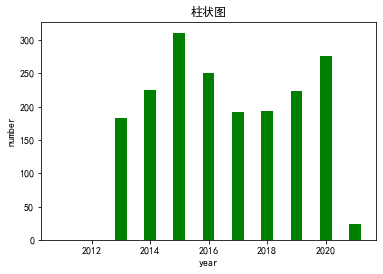

In [20]:
# -*- coding: utf-8 -*-

import urllib.request
import json

import requests
import warnings
#warnings.filterwarnings("ignore") #方式1
#requests.packages.urllib3.disable_warnings()#方式2
import urllib3
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)#方式3
r=requests.get("https://www.weibo.com/u/1713031610?c=spr_qdhz_bd_360ss_weibo_mr&is_all=1",verify=False)
print(r.status_code)
#定义要爬取的微博大V的微博ID

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import mlab
from matplotlib import rcParams

id='1713031610'

#设置代理IP
proxy_addr="122.241.72.191:808"

#定义页面打开函数
def use_proxy(url,proxy_addr):
    req=urllib.request.Request(url)
    req.add_header("User-Agent","Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/49.0.2623.221 Safari/537.36 SE 2.X MetaSr 1.0")
    proxy=urllib.request.ProxyHandler({'http':proxy_addr})
    opener=urllib.request.build_opener(proxy,urllib.request.HTTPHandler)
    urllib.request.install_opener(opener)
    data=urllib.request.urlopen(req).read().decode('utf-8','ignore')
    return data

#获取微博主页的containerid，爬取微博内容时需要此id
def get_containerid(url):
    data=use_proxy(url,proxy_addr)
    content=json.loads(data).get('data')
    for data in content.get('tabsInfo').get('tabs'):
        if(data.get('tab_type')=='weibo'):
            containerid=data.get('containerid')
    return containerid

#获取微博大V账号的用户基本信息，如：微博昵称、微博地址、微博头像、关注人数、粉丝数、性别、等级等
def get_userInfo(id):
    url='https://m.weibo.cn/api/container/getIndex?type=uid&value='+id
    data=use_proxy(url,proxy_addr)
    content=json.loads(data).get('data')
    profile_image_url=content.get('userInfo').get('profile_image_url')
    description=content.get('userInfo').get('description')
    profile_url=content.get('userInfo').get('profile_url')
    verified=content.get('userInfo').get('verified')
    guanzhu=content.get('userInfo').get('follow_count')
    name=content.get('userInfo').get('screen_name')
    fensi=content.get('userInfo').get('followers_count')
    gender=content.get('userInfo').get('gender')
    urank=content.get('userInfo').get('urank')
    print("微博昵称："+name+"\n"+"微博主页地址："+profile_url+"\n"+"微博头像地址："+profile_image_url+"\n"+"是否认证："+str(verified)+"\n"+"微博说明："+description+"\n"+"关注人数："+str(guanzhu)+"\n"+"粉丝数："+str(fensi)+"\n"+"性别："+gender+"\n"+"微博等级："+str(urank)+"\n")


#获取微博内容信息,并保存到文本中，内容包括：每条微博的内容、微博详情页面地址、点赞数、评论数、转发数等
def get_weibo(id,file):
    i=1
    y11=0;y12=0;y13=0;y14=0;y15=0;y16=0;y17=0;y18=0;y19=0;y20=0;y21=0;
        
    index = [2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021];
    while True:
        url='https://m.weibo.cn/api/container/getIndex?type=uid&value='+id
        weibo_url='https://m.weibo.cn/api/container/getIndex?type=uid&value='+id+'&containerid='+get_containerid(url)+'&page='+str(i)
        
        
        try:
            data=use_proxy(weibo_url,proxy_addr)
            content=json.loads(data).get('data')
            cards=content.get('cards')
            if(len(cards)>0):
                for j in range(len(cards)):
                    print("-----正在爬取第"+str(i)+"页，第"+str(j)+"条微博------")
                    card_type=cards[j].get('card_type')
                    if(card_type==9):
                        mblog=cards[j].get('mblog')
                        attitudes_count=mblog.get('attitudes_count')
                        comments_count=mblog.get('comments_count')
                        created_at=mblog.get('created_at')
                        reposts_count=mblog.get('reposts_count')
                        scheme=cards[j].get('scheme')
                        text=mblog.get('text')
                        s=str(created_at)
                        s=s[-4:]
                        s=int(s)
                        if(s==index[0]):
                            y11+=1
                        elif(s==index[1]):
                            y12+=1
                        elif(s==index[2]):
                            y13+=1
                        elif(s==index[3]):
                            y14+=1
                        elif(s==index[4]):
                            y15+=1
                        elif(s==index[5]):
                            y16+=1
                        elif(s==index[6]):
                            y17+=1
                        elif(s==index[7]):
                            y18+=1
                        elif(s==index[8]):
                            y19+=1
                        elif(s==index[9]):
                            y20+=1
                        elif(s==index[10]):
                            y21+=1
                        else:
                            print('wrong')
       
                        with open(file,'a',encoding='utf-8') as fh:
                            fh.write("----第"+str(i)+"页，第"+str(j)+"条微博----"+"\n")
                            fh.write("微博地址："+str(scheme)+"\n"+"发布时间："+str(created_at)+"\n"+"微博内容："+text+"\n"+"点赞数："+str(attitudes_count)+"\n"+"评论数："+str(comments_count)+"\n"+"转发数："+str(reposts_count)+"\n")
                i+=1
            
            
            else:
                break
        except Exception as e:
            print(e)
            pass
    Y = [y11,y12,y13,y14,y15,y16,y17,y18,y19,y20,y21]
    plt.rcParams['font.sans-serif']=['SimHei']#正常显示中文汉字
    plt.bar(index,Y, 0.4, color="g")
    plt.xlabel("year")
    plt.ylabel("number")
    plt.title("柱状图")

    plt.show()

if __name__=="__main__":
    file=id+".txt"
    get_userInfo(id)
    get_weibo(id,file)


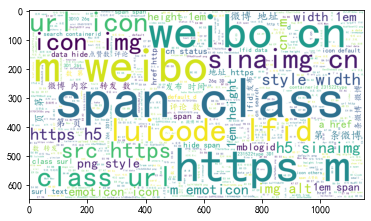

In [21]:
import matplotlib
import matplotlib.pyplot as plt #数据可视化
import jieba #词语切割
import wordcloud #分词
from wordcloud import WordCloud,ImageColorGenerator,STOPWORDS #词云，颜色生成器，停止
import numpy as np #科学计算
from PIL import Image #处理图片

import matplotlib.pyplot as plt
from wordcloud import WordCloud
from imageio import imread
import jieba
from pylab import mpl
 
# 使用matplotlib能够显示中文
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

def ciyun():
    #打开文本
    with open('1713031610.txt','r',encoding='UTF-8') as f:  # 打开新的文本转码为utf-8
        textfile= f.read()  #读取文本内容
    wordlist = jieba.cut_for_search(textfile)#切割词语
    stop_words =set(line.strip() for line in open('1713031610.txt',encoding='utf-8')) 
    space_list = ' '.join(wordlist) # 链接词语
    #space_list = ' '.join(commentlist) # 链接词语
    #print(space_list)
    backgroud = np.array(Image.open('beijin.png')) #背景图片，只有黑白图才能按照形状生成词云
    mywordcloud = WordCloud(width=14000, height=2200,
                            background_color="white", mode="RGBA",#背景颜色
                            mask=backgroud, #写字用的背景图，从图片中提取颜色
                            max_words=500, #最大词语数
                            stopwords=stop_words,#停止的默认词语STOPWORDS
                            font_path='simkai.ttf',#源码自带字体
                            max_font_size=200,#最大字体尺寸
                            random_state=50,#随机角度
                            scale=1).generate(space_list) #生成词云
    image_color = ImageColorGenerator(backgroud)#生成词云的颜色backgroud
    plt.imshow(mywordcloud) #显示词云
    #plt.axis('off') #关闭坐标（x,y轴）
    plt.savefig('cytu.png') #保存图片
    plt.show()#显示
def main():
    ciyun()
 
if __name__ == '__main__':
    main()